In [1]:
%matplotlib notebook
import numpy as np # linear algebra
import pandas as pd # data processing
import seaborn as sns  # data visualization library  
import matplotlib.pyplot as plt

In [2]:
df_identity_train = pd.read_csv("train_identity.csv")
df_identity_train.head()

,TransactionID,id_01,id_02,id_03,id_04,id_05,id_06,id_07,id_08,id_09,...,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo
0,2987004,0.0,70787.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,samsung browser 6.2,32.0,2220x1080,match_status:2,T,F,T,T,mobile,SAMSUNG SM-G892A Build/NRD90M
1,2987008,-5.0,98945.0,NaN,NaN,0.0,-5.0,NaN,NaN,NaN,...,mobile safari 11.0,32.0,1334x750,match_status:1,T,F,F,T,mobile,iOS Device
2,2987010,-5.0,191631.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,...,chrome 62.0,NaN,NaN,NaN,F,F,T,T,desktop,Windows
3,2987011,-5.0,221832.0,NaN,NaN,0.0,-6.0,NaN,NaN,NaN,...,chrome 62.0,NaN,NaN,NaN,F,F,T,T,desktop,NaN
4,2987016,0.0,7460.0,0.0,0.0,1.0,0.0,NaN,NaN,0.0,...,chrome 62.0,24.0,1280x800,match_status:2,T,F,T,T,desktop,MacOS


In [3]:
df_identity_train.shape

(144233, 41)

In [4]:
df_identity_test = pd.read_csv("test_identity.csv")
df_identity_test.head()

,TransactionID,id-01,id-02,id-03,id-04,id-05,id-06,id-07,id-08,id-09,...,id-31,id-32,id-33,id-34,id-35,id-36,id-37,id-38,DeviceType,DeviceInfo
0,3663586,-45.0,280290.0,NaN,NaN,0.0,0.0,NaN,NaN,NaN,...,chrome 67.0 for android,NaN,NaN,NaN,F,F,T,F,mobile,MYA-L13 Build/HUAWEIMYA-L13
1,3663588,0.0,3579.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,...,chrome 67.0 for android,24.0,1280x720,match_status:2,T,F,T,T,mobile,LGLS676 Build/MXB48T
2,3663597,-5.0,185210.0,NaN,NaN,1.0,0.0,NaN,NaN,NaN,...,ie 11.0 for tablet,NaN,NaN,NaN,F,T,T,F,desktop,Trident/7.0
3,3663601,-45.0,252944.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,...,chrome 67.0 for android,NaN,NaN,NaN,F,F,T,F,mobile,MYA-L13 Build/HUAWEIMYA-L13
4,3663602,-95.0,328680.0,NaN,NaN,7.0,-33.0,NaN,NaN,NaN,...,chrome 67.0 for android,NaN,NaN,NaN,F,F,T,F,mobile,SM-G9650 Build/R16NW


In [5]:
df_identity_test.shape

(141907, 41)

In [6]:
df_transaction_train = pd.read_csv("train_transaction.csv")
df_transaction_train.head()

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,...,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339
0,2987000,0,86400,68.5,W,13926,NaN,150.0,discover,142.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2987001,0,86401,29.0,W,2755,404.0,150.0,mastercard,102.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2987002,0,86469,59.0,W,4663,490.0,150.0,visa,166.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2987003,0,86499,50.0,W,18132,567.0,150.0,mastercard,117.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2987004,0,86506,50.0,H,4497,514.0,150.0,mastercard,102.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [7]:
df_transaction_train.shape

(590540, 394)

In [8]:
df_transaction_test = pd.read_csv("test_transaction.csv")
df_transaction_test.head()

,TransactionID,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,card6,...,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339
0,3663549,18403224,31.95,W,10409,111.0,150.0,visa,226.0,debit,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,3663550,18403263,49.00,W,4272,111.0,150.0,visa,226.0,debit,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3663551,18403310,171.00,W,4476,574.0,150.0,visa,226.0,debit,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3663552,18403310,284.95,W,10989,360.0,150.0,visa,166.0,debit,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,3663553,18403317,67.95,W,18018,452.0,150.0,mastercard,117.0,debit,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
df_transaction_test.shape

(506691, 393)

In [10]:
df_transaction_train.describe()

,TransactionID,isFraud,TransactionDT,TransactionAmt,card1,card2,card3,card5,addr1,addr2,...,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339
count,5.905400e+05,590540.000000,5.905400e+05,590540.000000,590540.000000,581607.000000,588975.000000,586281.000000,524834.000000,524834.000000,...,82351.000000,82351.000000,82351.000000,82351.000000,82351.000000,82351.00000,82351.000000,82351.000000,82351.000000,82351.000000
mean,3.282270e+06,0.034990,7.372311e+06,135.027176,9898.734658,362.555488,153.194925,199.278897,290.733794,86.800630,...,0.775874,721.741883,1375.783644,1014.622782,9.807015,59.16455,28.530903,55.352422,151.160542,100.700882
std,1.704744e+05,0.183755,4.617224e+06,239.162522,4901.170153,157.793246,11.336444,41.244453,101.741072,2.690623,...,4.727971,6217.223583,11169.275702,7955.735482,243.861391,387.62948,274.576920,668.486833,1095.034387,814.946722
min,2.987000e+06,0.000000,8.640000e+04,0.251000,1000.000000,100.000000,100.000000,100.000000,100.000000,10.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
25%,3.134635e+06,0.000000,3.027058e+06,43.321000,6019.000000,214.000000,150.000000,166.000000,204.000000,87.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
50%,3.282270e+06,0.000000,7.306528e+06,68.769000,9678.000000,361.000000,150.000000,226.000000,299.000000,87.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
75%,3.429904e+06,0.000000,1.124662e+07,125.000000,14184.000000,512.000000,150.000000,226.000000,330.000000,87.000000,...,0.000000,0.000000,25.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
max,3.577539e+06,1.000000,1.581113e+07,31937.391000,18396.000000,600.000000,231.000000,237.000000,540.000000,102.000000,...,55.000000,160000.000000,160000.000000,160000.000000,55125.000000,55125.00000,55125.000000,104060.000000,104060.000000,104060.000000


In [11]:
df_identity_train.describe()

,TransactionID,id_01,id_02,id_03,id_04,id_05,id_06,id_07,id_08,id_09,...,id_17,id_18,id_19,id_20,id_21,id_22,id_24,id_25,id_26,id_32
count,1.442330e+05,144233.000000,140872.000000,66324.000000,66324.000000,136865.000000,136865.000000,5155.000000,5155.000000,74926.000000,...,139369.000000,45113.000000,139318.000000,139261.000000,5159.000000,5169.000000,4747.000000,5132.000000,5163.000000,77586.000000
mean,3.236329e+06,-10.170502,174716.584708,0.060189,-0.058938,1.615585,-6.698710,13.285354,-38.600388,0.091023,...,189.451377,14.237337,353.128174,403.882666,368.269820,16.002708,12.800927,329.608924,149.070308,26.508597
std,1.788496e+05,14.347949,159651.816856,0.598231,0.701015,5.249856,16.491104,11.384207,26.084899,0.983842,...,30.375360,1.561302,141.095343,152.160327,198.847038,6.897665,2.372447,97.461089,32.101995,3.737502
min,2.987004e+06,-100.000000,1.000000,-13.000000,-28.000000,-72.000000,-100.000000,-46.000000,-100.000000,-36.000000,...,100.000000,10.000000,100.000000,100.000000,100.000000,10.000000,11.000000,100.000000,100.000000,0.000000
25%,3.077142e+06,-10.000000,67992.000000,0.000000,0.000000,0.000000,-6.000000,5.000000,-48.000000,0.000000,...,166.000000,13.000000,266.000000,256.000000,252.000000,14.000000,11.000000,321.000000,119.000000,24.000000
50%,3.198818e+06,-5.000000,125800.500000,0.000000,0.000000,0.000000,0.000000,14.000000,-34.000000,0.000000,...,166.000000,15.000000,341.000000,472.000000,252.000000,14.000000,11.000000,321.000000,149.000000,24.000000
75%,3.392923e+06,-5.000000,228749.000000,0.000000,0.000000,1.000000,0.000000,22.000000,-23.000000,0.000000,...,225.000000,15.000000,427.000000,533.000000,486.500000,14.000000,15.000000,371.000000,169.000000,32.000000
max,3.577534e+06,0.000000,999595.000000,10.000000,0.000000,52.000000,0.000000,61.000000,0.000000,25.000000,...,229.000000,29.000000,671.000000,661.000000,854.000000,44.000000,26.000000,548.000000,216.000000,32.000000


In [12]:
df_transaction_train['isFraud'].explode().value_counts()

0    569877
1     20663
Name: isFraud, dtype: int64

In [13]:
df_transaction_train['isFraud'].dtype

dtype('int64')

### df_transaction_test dose not have the column of "isFraud".

In [14]:
df_transaction_train['card2'].dtype

dtype('float64')

In [15]:
df_transaction_train['addr1'].dtype

dtype('float64')

In [16]:
col_object = df_transaction_train.dtypes[df_transaction_train.dtypes == 'object']
print(col_object)

ProductCD        object
card4            object
card6            object
P_emaildomain    object
R_emaildomain    object
M1               object
M2               object
M3               object
M4               object
M5               object
M6               object
M7               object
M8               object
M9               object
dtype: object


In [17]:
col_int = df_transaction_train.dtypes[df_transaction_train.dtypes == 'int64']
print(col_int)

TransactionID    int64
isFraud          int64
TransactionDT    int64
card1            int64
dtype: object


In [18]:
print("number of categorical data:", len(col_object))
for col in col_object.index:
    print("------",col,"--------------")
    print(df_transaction_train[col].explode().value_counts())


number of categorical data: 14
------ ProductCD --------------
W    439670
C     68519
R     37699
H     33024
S     11628
Name: ProductCD, dtype: int64
------ card4 --------------
visa                384767
mastercard          189217
american express      8328
discover              6651
Name: card4, dtype: int64
------ card6 --------------
debit              439938
credit             148986
debit or credit        30
charge card            15
Name: card6, dtype: int64
------ P_emaildomain --------------
gmail.com           228355
yahoo.com           100934
hotmail.com          45250
anonymous.com        36998
aol.com              28289
comcast.net           7888
icloud.com            6267
outlook.com           5096
msn.com               4092
att.net               4033
live.com              3041
sbcglobal.net         2970
verizon.net           2705
ymail.com             2396
bellsouth.net         1909
yahoo.com.mx          1543
me.com                1522
cox.net               1393
opton

In [19]:
col_object_identity = df_identity_train.dtypes[df_identity_train.dtypes == 'object']
print(col_object_identity)

id_12         object
id_15         object
id_16         object
id_23         object
id_27         object
id_28         object
id_29         object
id_30         object
id_31         object
id_33         object
id_34         object
id_35         object
id_36         object
id_37         object
id_38         object
DeviceType    object
DeviceInfo    object
dtype: object


In [20]:
col_int_identity = df_identity_train.dtypes[df_identity_train.dtypes == 'int64']
print(col_int_identity)

TransactionID    int64
dtype: object


In [21]:
print("number of categorical data:", len(col_object_identity))
for col in col_object_identity.index:
    print("------",col,"--------------")
    print(df_identity_train[col].explode().value_counts())

number of categorical data: 17
------ id_12 --------------
NotFound    123025
Found        21208
Name: id_12, dtype: int64
------ id_15 --------------
Found      67728
New        61612
Unknown    11645
Name: id_15, dtype: int64
------ id_16 --------------
Found       66324
NotFound    63016
Name: id_16, dtype: int64
------ id_23 --------------
IP_PROXY:TRANSPARENT    3489
IP_PROXY:ANONYMOUS      1071
IP_PROXY:HIDDEN          609
Name: id_23, dtype: int64
------ id_27 --------------
Found       5155
NotFound      14
Name: id_27, dtype: int64
------ id_28 --------------
Found    76232
New      64746
Name: id_28, dtype: int64
------ id_29 --------------
Found       74926
NotFound    66052
Name: id_29, dtype: int64
------ id_30 --------------
Windows 10          21155
Windows 7           13110
iOS 11.2.1           3722
iOS 11.1.2           3699
Android 7.0          2871
                    ...  
func                   10
iOS 11.4.0              5
Mac OS X 10_13_5        4
Windows          

# Find out the percentage of missing values in each column in the dataset


In [22]:
p_missing = df_identity_train.isnull().sum() * 100 / len(df_identity_train)
p_missing_identity = pd.DataFrame({'column_name': df_identity_train.columns,
                                 'percent_missing': p_missing})
p_missing_identity[p_missing_identity['percent_missing']>1].sort_values(by='percent_missing', ascending=False)

,column_name,percent_missing
id_24,id_24,96.708798
id_25,id_25,96.441868
id_07,id_07,96.425922
id_08,id_08,96.425922
id_21,id_21,96.423149
id_26,id_26,96.420375
id_27,id_27,96.416215
id_23,id_23,96.416215
id_22,id_22,96.416215
id_18,id_18,68.722137


<IPython.core.display.Javascript object>


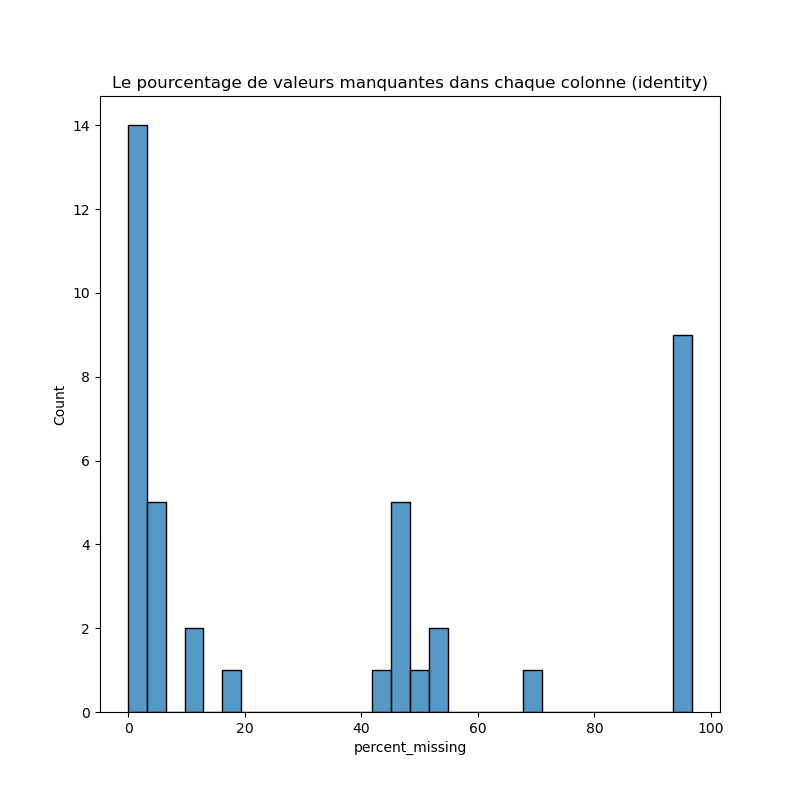

In [41]:
plt.figure(figsize=(8,8))
p = sns.histplot(data=p_missing_identity, x="percent_missing", bins=30)
plt.set_xlabel="Le pourcentage de valeurs manquantes"
plt.set_ylabel = "Compte"
#plt.title("The percentage of missing values in each column in the identity dataset")
plt.title("Le pourcentage de valeurs manquantes dans chaque colonne (identity)") 

plt.show()
plt.savefig('missingColumn_identity.png')

In [25]:
p_missing = df_transaction_train.isnull().sum() * 100 / len(df_transaction_train)
p_missing_transaction = pd.DataFrame({'column_name': df_transaction_train.columns,
                                 'percent_missing': p_missing})
miss_70 = p_missing_transaction[p_missing_transaction['percent_missing']>70].sort_values(by='percent_missing', ascending=False)
print("len:",len(miss_70))
print(miss_70)

len: 168
      column_name  percent_missing
dist2       dist2        93.628374
D7             D7        93.409930
D13           D13        89.509263
D14           D14        89.469469
D12           D12        89.041047
...           ...              ...
V259         V259        76.053104
V239         V239        76.053104
V271         V271        76.053104
V272         V272        76.053104
V270         V270        76.053104

[168 rows x 2 columns]


<IPython.core.display.Javascript object>


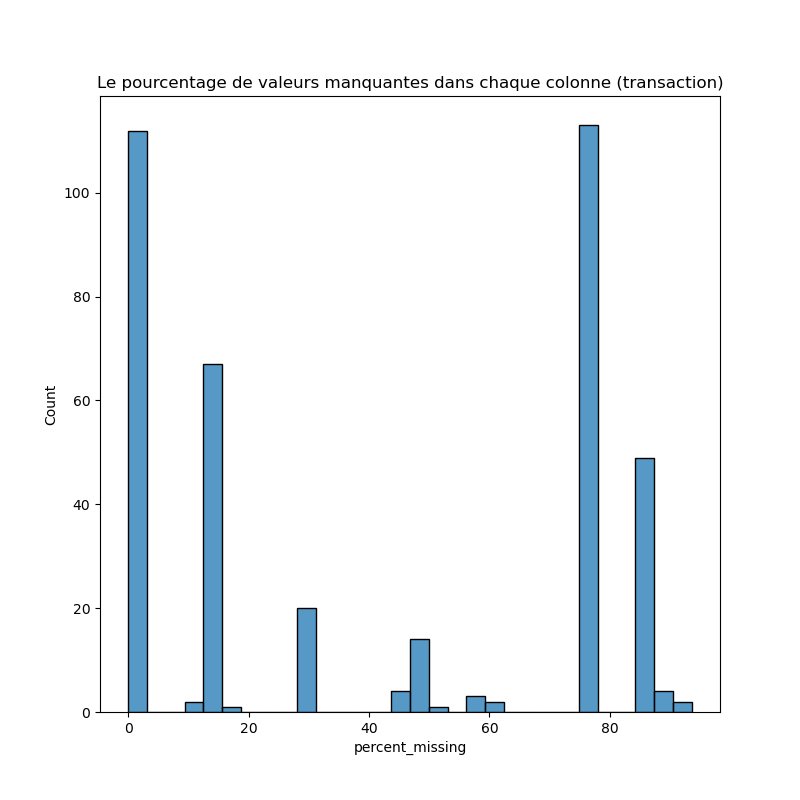

In [42]:
plt.figure(figsize=(8,8))
sns.histplot(data=p_missing_transaction, x="percent_missing", bins=30)
#plt.title("The percentage of missing values in each column in the transaction dataset")
plt.set_xlabel="Le pourcentage de valeurs manquantes"
plt.set_ylabel = "Compte"

plt.title("Le pourcentage de valeurs manquantes dans chaque colonne (transaction)") 
plt.show()
plt.savefig('missingColumn_transaction.png')


In [26]:
print(list(df_transaction_train.columns))

['TransactionID', 'isFraud', 'TransactionDT', 'TransactionAmt', 'ProductCD', 'card1', 'card2', 'card3', 'card4', 'card5', 'card6', 'addr1', 'addr2', 'dist1', 'dist2', 'P_emaildomain', 'R_emaildomain', 'C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8', 'C9', 'C10', 'C11', 'C12', 'C13', 'C14', 'D1', 'D2', 'D3', 'D4', 'D5', 'D6', 'D7', 'D8', 'D9', 'D10', 'D11', 'D12', 'D13', 'D14', 'D15', 'M1', 'M2', 'M3', 'M4', 'M5', 'M6', 'M7', 'M8', 'M9', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'V29', 'V30', 'V31', 'V32', 'V33', 'V34', 'V35', 'V36', 'V37', 'V38', 'V39', 'V40', 'V41', 'V42', 'V43', 'V44', 'V45', 'V46', 'V47', 'V48', 'V49', 'V50', 'V51', 'V52', 'V53', 'V54', 'V55', 'V56', 'V57', 'V58', 'V59', 'V60', 'V61', 'V62', 'V63', 'V64', 'V65', 'V66', 'V67', 'V68', 'V69', 'V70', 'V71', 'V72', 'V73', 'V74', 'V75', 'V76', 'V77', 'V78', 'V79', 'V80', 'V81', 'V

In [27]:
print(df_identity_train.columns)

Index(['TransactionID', 'id_01', 'id_02', 'id_03', 'id_04', 'id_05', 'id_06',
       'id_07', 'id_08', 'id_09', 'id_10', 'id_11', 'id_12', 'id_13', 'id_14',
       'id_15', 'id_16', 'id_17', 'id_18', 'id_19', 'id_20', 'id_21', 'id_22',
       'id_23', 'id_24', 'id_25', 'id_26', 'id_27', 'id_28', 'id_29', 'id_30',
       'id_31', 'id_32', 'id_33', 'id_34', 'id_35', 'id_36', 'id_37', 'id_38',
       'DeviceType', 'DeviceInfo'],
      dtype='object')


In [28]:
df_transaction_train['TransactionDT'].min()

86400

In [29]:
df_transaction_train['TransactionDT'].max()

15811131

# Using Categorical Data with One Hot Encoding
1. Common strategies for transforming categorical features include feature aggregation, graph-based transformation, or deep-learning approaches such as feature embeddings.
2. one-hot encoding can be applied to nominal variables, in order to improve the performance of the algorithm. 

# Concept drift
Concept drift requires the design of learning strategies that can cope with temporal changes in statistical distributions, a topic known as online learning.

## transforming categorical features include feature aggregation, graph-based transformation, or deep-learning approaches such as feature embeddings.

## Performance measures: 
Standard measures for classification systems, such as the mean misclassification error or the AUC ROC, are not well suited for detection problems due to the class imbalance issue, and the complex cost structure of fraud detection. A fraud detection system should be able to maximize the detection of fraudulent transactions while minimizing the number of incorrectly predicted frauds (false positives). It is often necessary to consider multiple measures to assess the overall performance of a fraud detection system. Despite its central role in the design of a fraud detection system, there is currently no consensus on which set of performance measures should be used.

## Permutation Importance
(1) pick up one feature
(2) shuffling all of the numbers in that features 
(3) some accurency may drop down, and how much drop down will tell you how important the feature is.
 When you remove it, it will cost lots of time to train between the dataset. So, under this method we don't need to retrain the whole model. 

## Models: CatBoost, XGBoost, LightGBM (the winner solution)
## Predictions: Ensemble, Blend/Stack, UID consistency (the winner solution)